Going to train on 50,000,000 molecules from GDB-17

May later try scraping for all molecules w/ positive charge

In [1]:
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline

import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
import salty
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from random import shuffle
import pandas as pd

/home/wesleybeckner/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
df = pd.read_csv('../../../../../../GDB17.50000000', names=['smiles'])

In [4]:
df = df.sample(frac=1)

In [5]:
df.to_csv('../data/GDB17_shuffled.50000000', index=False)

In [4]:
values = df['smiles']
print(values.shape)

(50000000,)


In [5]:
smile_max_length = values.map(len).max()
print(smile_max_length)

51


We may want to remove cations with more than 25 heavy atoms

(array([1.0000000e+00, 6.0000000e+00, 6.3700000e+02, 1.4796200e+05,
        6.6722430e+06, 2.9969172e+07, 1.2690346e+07, 5.0860600e+05,
        1.0870000e+04, 1.5700000e+02]),
 array([ 2. ,  6.9, 11.8, 16.7, 21.6, 26.5, 31.4, 36.3, 41.2, 46.1, 51. ]),
 <a list of 10 Patch objects>)

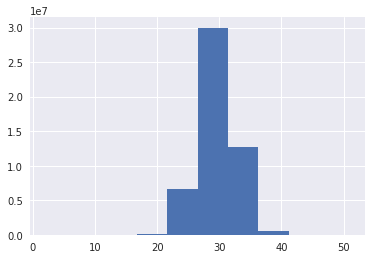

In [6]:
plt.hist(values.map(len))

In [7]:
def pad_smiles(smiles_string, smile_max_length):
     if len(smiles_string) < smile_max_length:
            return smiles_string + " " * (smile_max_length - len(smiles_string))

In [8]:
padded_smiles =  [pad_smiles(i, smile_max_length) for i in values if pad_smiles(i, smile_max_length)]

In [9]:
shuffle(padded_smiles)

In [10]:
def create_char_list(char_set, smile_series):
    for smile in smile_series:
        char_set.update(set(smile))
    return char_set

In [11]:
char_set = set()
char_set = create_char_list(char_set, padded_smiles)

In [12]:
print(len(char_set))
char_set

31


{' ',
 '#',
 '(',
 ')',
 '+',
 '-',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '=',
 'B',
 'C',
 'F',
 'H',
 'I',
 'N',
 'O',
 'S',
 '[',
 ']',
 'c',
 'l',
 'n',
 'o',
 'r',
 's'}

In [13]:
properties = ['density', 'cpt', 'viscosity', 'thermal_conductivity',
              'melting_point']
props = properties
devmodel = salty.aggregate_data(props, merge='Union')
devmodel.Data['smiles_string'] = devmodel.Data['smiles-cation']
cations = devmodel.Data['smiles_string'].drop_duplicates()
cations = cations.reset_index(drop=True)
print(cations.shape)

(276,)


In [2]:
properties = ['density', 'cpt', 'viscosity', 'thermal_conductivity',
              'melting_point']
props = properties
devmodel = salty.aggregate_data(props, merge='Union')
devmodel.Data['smiles_string'] = devmodel.Data['smiles-cation'] + '.' +\
                devmodel.Data['smiles-anion']
salts = devmodel.Data['smiles_string'].drop_duplicates() 
salts = salts.reset_index(drop=True)
print(salts.shape)

(688,)


In [5]:
pd.DataFrame(salts).to_csv('../data/salts.csv', index=False)

In [14]:
padded_smiles_2 =  [pad_smiles(i, smile_max_length) for i in cations if pad_smiles(i, smile_max_length)]

In [15]:
char_set_2 = set()
char_set_2 = create_char_list(char_set_2, padded_smiles_2)

In [16]:
char_set.update(set(char_set_2))

In [17]:
char_set

{' ',
 '#',
 '(',
 ')',
 '+',
 '-',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '=',
 'B',
 'C',
 'F',
 'H',
 'I',
 'N',
 'O',
 'P',
 'S',
 '[',
 '\\',
 ']',
 'c',
 'l',
 'n',
 'o',
 'r',
 's'}

In [18]:
char_list = list(char_set)
chars_in_dict = len(char_list)
char_to_index = dict((c, i) for i, c in enumerate(char_list))
index_to_char = dict((i, c) for i, c in enumerate(char_list))

In [ ]:
padded_smiles =  [pad_smiles(i, smile_max_length) for i in values if pad_smiles(i, smile_max_length)]
shuffle(padded_smiles)
padded_smiles = padded_smiles[:1000000]

import csv
with open('../data/1mil_GEDB17.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(padded_smiles)

In [328]:
import json
json = json.dumps(char_to_index)
f = open("1mil_GDB17.json","w")
f.write(json)
f.close()

In [19]:
# if loading previous model
smile_max_length = 51
import json
f = open("1mil_GDB17.json","r")
char_to_index = json.loads(f.read())
char_set = set(char_to_index.keys())
char_list = list(char_to_index.keys())
index_to_char = dict((i, c) for i, c in enumerate(char_list))
chars_in_dict = len(char_list)

In [20]:
set(char_to_index.keys())

{' ',
 '#',
 '(',
 ')',
 '+',
 '-',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '=',
 'B',
 'C',
 'F',
 'H',
 'I',
 'N',
 'O',
 'P',
 'S',
 '[',
 '\\',
 ']',
 'c',
 'l',
 'n',
 'o',
 'r',
 's'}

In [39]:
data_size = 1000000

In [28]:
X_train = np.zeros((data_size, smile_max_length, chars_in_dict), dtype=np.float32)

In [29]:
X_train.shape

(1000000, 51, 33)

In [30]:
import random

In [31]:
random.choice(cations)

'[P+](CC)(CC)(CC)CCCCCCC'

In [32]:
# for each i, randomly select whether to sample from GDB or cations (padded_smiles_2)
for i, smile in enumerate(padded_smiles[:data_size]):
#     linearly_scaled_prob = random.random() < i/data_size
#     if linearly_scaled_prob:
    smile = random.choice(cations)
    for j, char in enumerate(smile):
        X_train[i, j, char_to_index[char]] = 1

In [340]:
for i, smile in enumerate(padded_smiles[:data_size]):
    for j, char in enumerate(smile):
        X_train[i, j, char_to_index[char]] = 1

In [33]:
X_train, X_test = train_test_split(X_train, test_size=0.33, random_state=42)

In [34]:
X_train[0]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
X_train.shape

(670000, 51, 33)

In [36]:
# build special X_train that contains 50% bootstrapped cation data

In [37]:
# need to build RNN to encode. some issues include what the 'embedded dimension' is (vector length of embedded sequence)

so some keras version stuff. 1.0 uses keras.losses to store its loss functions. 2.0 uses objectives. we'll just have to be consistent

In [38]:
from keras import backend as K
from keras.objectives import binary_crossentropy #objs or losses
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras.layers.core import Dense, Activation, Flatten, RepeatVector
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import GRU
from keras.layers.convolutional import Convolution1D

Here I've adapted the exact architecture used in the [paper](https://github.com/maxhodak/keras-molecules/blob/master/molecules/model.py)

In [40]:
def Encoder(x, latent_rep_size, smile_max_length, epsilon_std = 0.01):
    h = Convolution1D(9, 9, activation = 'relu', name='conv_1')(x)
    h = Convolution1D(9, 9, activation = 'relu', name='conv_2')(h)
    h = Convolution1D(10, 11, activation = 'relu', name='conv_3')(h)
    h = Flatten(name = 'flatten_1')(h)
    h = Dense(435, activation = 'relu', name = 'dense_1')(h)

    def sampling(args):
        z_mean_, z_log_var_ = args
        batch_size = K.shape(z_mean_)[0]
        epsilon = K.random_normal(shape=(batch_size, latent_rep_size),
                                  mean=0., stddev = epsilon_std)
        return z_mean_ + K.exp(z_log_var_ / 2) * epsilon

    z_mean = Dense(latent_rep_size, name='z_mean', activation = 'linear')(h)
    z_log_var = Dense(latent_rep_size, name='z_log_var', activation = 'linear')(h)

    def vae_loss(x, x_decoded_mean):
        x = K.flatten(x)
        x_decoded_mean = K.flatten(x_decoded_mean)
        xent_loss = smile_max_length * binary_crossentropy(x, x_decoded_mean)
        kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - \
                                 K.exp(z_log_var), axis = -1)
        return xent_loss + kl_loss

    return (vae_loss, Lambda(sampling, output_shape=(latent_rep_size,),
                             name='lambda')([z_mean, z_log_var]))

def Decoder(z, latent_rep_size, smile_max_length, charset_length):
    h = Dense(latent_rep_size, name='latent_input', activation = 'relu')(z)
    h = RepeatVector(smile_max_length, name='repeat_vector')(h)
    h = GRU(501, return_sequences = True, name='gru_1')(h)
    h = GRU(501, return_sequences = True, name='gru_2')(h)
    h = GRU(501, return_sequences = True, name='gru_3')(h)
    return TimeDistributed(Dense(charset_length, activation='softmax'),
                           name='decoded_mean')(h)

In [41]:
x = Input(shape=(smile_max_length, len(char_set)))

In [42]:
_, z = Encoder(x, latent_rep_size=292, smile_max_length=smile_max_length)

In [43]:
encoder = Model(x, z)

encoded_input looks like a dummy layer here:

In [44]:
encoded_input = Input(shape=(292,))

In [45]:
decoder = Model(encoded_input, Decoder(encoded_input, latent_rep_size=292,
                                       smile_max_length=smile_max_length,
                 charset_length=len(char_set)))

create a separate autoencoder model that combines the encoder and decoder (I guess the former cells are for accessing those separate parts of the model)

In [46]:
x1 = Input(shape=(smile_max_length, len(char_set)), name='input_1')

In [47]:
vae_loss, z1 = Encoder(x1, latent_rep_size=292, smile_max_length=smile_max_length)

In [48]:
autoencoder = Model(x1, Decoder(z1, latent_rep_size=292,
                                       smile_max_length=smile_max_length,
                 charset_length=len(char_set)))

we compile and fit

In [49]:
autoencoder.compile(optimizer='Adam', loss=vae_loss, metrics =['accuracy'])

In [50]:
autoencoder.fit(X_train, X_train, shuffle = False, validation_data=(X_test, X_test))

Train on 670000 samples, validate on 330000 samples
Epoch 1/1
670000/670000 [==============================] - 11427s 17ms/step - loss: 1.0780 - acc: 0.4574 - val_loss: 0.9336 - val_acc: 0.4419


In [54]:
#trained on 1million GDB17 molecules
autoencoder.save("1Mil_GDB17.h5")

In [345]:
#trained on 1million GDB17 molecules, 50/50 split of 500K GDB17/cation molecules, 500K cation molecules
autoencoder.save("1Mil_GDB17_split_500k_cation_500k.h5")

In [51]:
#trained on 1million cation molecules
autoencoder.save("Bootstrap_1Mil_Cation_1.h5")

In [318]:
#trained on 250K cation molecules
autoencoder.save("Bootstrap_250k_Cation_1.h5")

In [319]:
autoencoder.load_weights("1Mil_GDB17_split_500k.h5")

In [52]:
def sample(a, temperature=1.0):
    # helper function to sample an index from a probability array
#     a = np.log(a) / temperature
#     a = np.exp(a) / np.sum(np.exp(a))
#     return np.argmax(np.random.multinomial(1, a, 1))
    # work around from https://github.com/llSourcell/How-to-Generate-Music-Demo/issues/4
    a = np.log(a) / temperature 
    dist = np.exp(a)/np.sum(np.exp(a)) 
    choices = range(len(a)) 
    return np.random.choice(choices, p=dist)

In [53]:
# smi = values[29]
smi = cations[0]
print(smi)

CCCC[n+]1ccc(cc1)C


In [54]:
test_smi = smi
test_smi = pad_smiles(test_smi, smile_max_length)
Z = np.zeros((1, smile_max_length, len(char_list)), dtype=np.bool)
for t, char in enumerate(test_smi):
    Z[0, t, char_to_index[char]] = 1

In [69]:
string = ""
for i in autoencoder.predict(Z):
    for j in i:
        index = sample(j, temperature=1)
        string += index_to_char[index]
print("\n callback guess: " + string)


 callback guess: CCCC[n+]1ccc(cc1)C FB =3s\5Ss\B+873][[rOS4No4774[\S


In [35]:
properties = ['density', 'cpt', 'viscosity', 'thermal_conductivity',
              'melting_point']
props = properties
devmodel = salty.aggregate_data(props, merge='Union')
devmodel.Data['smiles_string'] = devmodel.Data['smiles-cation']
cations = devmodel.Data['smiles_string'].drop_duplicates()
print(cations.shape)

(276,)


In [36]:
cations = cations.reset_index(drop=True)

In [37]:
test_smi = cations[100]
test_smi = pad_smiles(test_smi, smile_max_length)
Z = np.zeros((1, smile_max_length, len(char_list)), dtype=np.bool)
for t, char in enumerate(test_smi):
    Z[0, t, char_to_index[char]] = 1
test_smi

'OCCCCCC([n+]1ccn(c1)C)                             '

In [38]:
string = ""
for i in autoencoder.predict(Z):
    for j in i:
        index = sample(j)
        string += index_to_char[index]
print("\n callback guess: " + string)


 callback guess: 2o21 226227422 22]44333333c#S41S\#SICCs+SSF1P(SS+SS


Alright. So now I'm going to loop through our 276 cations, sample 100x from the decoder based on these representations, and see how many sanitize with the RDKit

In [369]:
cation_samples = []
for smi_index, smi in enumerate(cations):
    smi = pad_smiles(smi, smile_max_length)
    Z = np.zeros((1, smile_max_length, len(char_list)), dtype=np.bool)
    for t, char in enumerate(smi):
        Z[0, t, char_to_index[char]] = 1
    string = ""
    for i in autoencoder.predict(Z):
        for j in i:
            index = sample(j, temperature=0.5)
            string += index_to_char[index]
    cation_samples.append(string)

In [370]:
print('sampled cations: {}'.format(len(cation_samples)))
print('unique samples: {}'.format(pd.DataFrame(cation_samples).drop_duplicates().shape[0]))

sampled cations: 276
unique samples: 276


In [371]:
cation_samples[:10]

['CCCC1C+]CcccccC))CN                                ',
 'CCCn(C([C+]CCCC)C                                  ',
 'CCCCn1cC[nC]Cc1CCO                                 ',
 'CCCC(=O)N+]1(CCCC     C                            ',
 'CCCOC[CHC]CCCCCC=CCC   C                           ',
 'C21CC=CC=C2[N+]13C(C)(C=C(N1CCCCC)C)               ',
 'C2=CC=CCCC2[C+]1=C(C)(C=C(N1CNCC=C))O              ',
 'C(1CCCCCCCCP+C(CCCCCC)NCCCCCC)  C C     C          ',
 'CCCCCCCCn1Cc[n+]Cc1)C                              ',
 'CCCCnCCO[C+]C(C)N                                  ']

In [1]:
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline

import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
import salty
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from random import shuffle
import pandas as pd
import random

#Keras build
from keras import backend as K
from keras.objectives import binary_crossentropy #objs or losses
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras.layers.core import Dense, Activation, Flatten, RepeatVector
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import GRU
from keras.layers.convolutional import Convolution1D

#cation data
cations = pd.read_csv('../data/cations.csv')
cations = cations['smiles_string']
categories = pd.read_csv('../data/categories.csv')
categories = categories['category']
coldic = pd.read_csv('../data/coldic.csv')
coldic = coldic.to_dict(orient='records')[0]

#supporting functions
import sys
sys.path.insert(0, '../')
from scripts import *

/home/wesley/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
#For loop to save semi-trained model to
#view PCAs and Z distributions during training

#training array info
smile_max_length = 51
import json
f = open("../data/gdb_char_to_index.json","r")
char_to_index = json.loads(f.read())
char_set = set(char_to_index.keys())
char_list = list(char_to_index.keys())
chars_in_dict = len(char_list)

#training data
df = pd.read_csv('../data/GDB/GDB17.1000000', names=['smiles'])
data_size = 100000
chemvae = MoleculeVAE()
chemvae.create(char_set, 51)

for p in range(10):
    values = df['smiles'][data_size*p:data_size*(p+1)]
    padded_smiles =  [pad_smiles(i, smile_max_length) for i in values if pad_smiles(i, smile_max_length)]
    X_train = np.zeros((data_size, smile_max_length, chars_in_dict), dtype=np.float32)

    for i, smile in enumerate(padded_smiles):
        for j, char in enumerate(smile):
            X_train[i, j, char_to_index[char]] = 1
    chemvae.autoencoder.fit(X_train, X_train, shuffle = False)
#     chemvae.save('1mil_GDB17_{}.h5'.format(p+1))
    

Epoch 1/1
100000/100000 [==============================] - 2916s 29ms/step - loss: 2.4396 - acc: 0.6447
Epoch 1/1
100000/100000 [==============================] - 2911s 29ms/step - loss: 1.9565 - acc: 0.7054
Epoch 1/1
100000/100000 [==============================] - 2956s 30ms/step - loss: 1.4395 - acc: 0.7884
Epoch 1/1
100000/100000 [==============================] - 4418s 44ms/step - loss: 1.1564 - acc: 0.8332
Epoch 1/1
100000/100000 [==============================] - 5776s 58ms/step - loss: 0.9807 - acc: 0.8607
Epoch 1/1
100000/100000 [==============================] - 5794s 58ms/step - loss: 0.8474 - acc: 0.8810
Epoch 1/1
100000/100000 [==============================] - 5818s 58ms/step - loss: 0.7599 - acc: 0.8936
Epoch 1/1
100000/100000 [==============================] - 5851s 59ms/step - loss: 0.6972 - acc: 0.9026
Epoch 1/1
100000/100000 [==============================] - 5856s 59ms/step - loss: 0.6553 - acc: 0.9087
Epoch 1/1
100000/100000 [==============================] - 5909s

In [14]:
#For loop to save semi-trained model to
#view PCAs and Z distributions during training

#training array info
smile_max_length = 51
import json
f = open("../data/1mil_GDB17.json","r")
char_to_index = json.loads(f.read())
char_set = set(char_to_index.keys())
char_list = list(char_to_index.keys())
chars_in_dict = len(char_list)

#training data
df = pd.read_csv('../data/GDB17.1000000', names=['smiles'])
data_size = 100000
chemvae = MoleculeVAE()
chemvae.create(char_set)

for p in range(10):
    values = df['smiles'][data_size*p:data_size*(p+1)]
    padded_smiles =  [pad_smiles(i, smile_max_length) for i in values if pad_smiles(i, smile_max_length)]
    X_train = np.zeros((data_size, smile_max_length, chars_in_dict), dtype=np.float32)

    for i, smile in enumerate(padded_smiles):
        for j, char in enumerate(smile):
            X_train[i, j, char_to_index[char]] = 1
    chemvae.autoencoder.fit(X_train, X_train, shuffle = False, validation_data=(X_test, X_test))
    chemvae.save('1mil_GDB17_{}.h5'.format(p+1))
    

Train on 100000 samples, validate on 330 samples
Epoch 1/1
100000/100000 [==============================] - 2918s 29ms/step - loss: 2.3310 - acc: 0.6586 - val_loss: 1.9623 - val_acc: 0.7072
Train on 100000 samples, validate on 330 samples
Epoch 1/1
100000/100000 [==============================] - 2844s 28ms/step - loss: 1.6895 - acc: 0.7494 - val_loss: 1.5008 - val_acc: 0.7752
Train on 100000 samples, validate on 330 samples
Epoch 1/1
100000/100000 [==============================] - 2855s 29ms/step - loss: 1.3475 - acc: 0.7994 - val_loss: 1.2539 - val_acc: 0.8137
Train on 100000 samples, validate on 330 samples
Epoch 1/1
100000/100000 [==============================] - 2877s 29ms/step - loss: 1.1615 - acc: 0.8279 - val_loss: 1.0960 - val_acc: 0.8387
Train on 100000 samples, validate on 330 samples
Epoch 1/1
100000/100000 [==============================] - 2846s 28ms/step - loss: 1.0236 - acc: 0.8491 - val_loss: 0.9993 - val_acc: 0.8551
Train on 100000 samples, validate on 330 samples
E

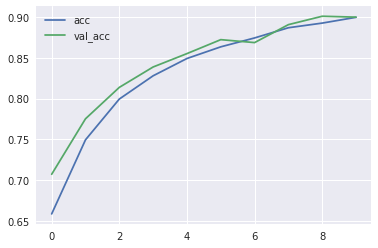

In [5]:
single_phase_1_history = {'acc': [0.6586, 0.7494, 0.7994, 0.8279, 0.8491, 0.8634, 0.8743, 0.8868, 0.8925, 0.8996],
                   'val_acc': [0.7072, 0.7752, 0.8137, 0.8387, 0.8551, 0.8722, 0.8686, 0.8906, 0.9009, 0.8998]}
plt.plot(single_phase_1_history['acc'], label='acc')
plt.plot(single_phase_1_history['val_acc'], label='val_acc')
plt.legend()

In [2]:
#For loop to save semi-trained model to
#view PCAs and Z distributions during training

#training array info
smile_max_length = 51
import json
f = open("../data/1mil_GDB17.json","r")
char_to_index = json.loads(f.read())
char_set = set(char_to_index.keys())
char_list = list(char_to_index.keys())
chars_in_dict = len(char_list)

#training data
chemvae = MoleculeVAE()
char_set = set(char_to_index.keys())
weights_file = '1mil_GDB17_500K_mix_5.h5'
chemvae.load(char_set, weights_file)
# df = pd.read_csv('../data/GDB17.1000000', names=['smiles'])
data_size = 100000


for p in range(0,5):
#     values = df['smiles'][data_size*p:data_size*(p+1)]
#     padded_smiles =  [pad_smiles(i, smile_max_length) for i in values if pad_smiles(i, smile_max_length)]
    X_train = np.zeros((data_size, smile_max_length, chars_in_dict), dtype=np.float32)
    
    # for each i, randomly select whether to sample from GDB or cations (padded_smiles_2)
#     for i, smile in enumerate(padded_smiles[:data_size]):
    for i in range(data_size):
#         linearly_scaled_prob = random.random() < 0.5#i/data_size
#         if linearly_scaled_prob:
#             smile = random.choice(cations)
        smile = random.choice(cations)
        for j, char in enumerate(smile):
            X_train[i, j, char_to_index[char]] = 1

    X_train, X_test = train_test_split(X_train, test_size=0.33, random_state=42)   
    chemvae.autoencoder.fit(X_train, X_train, shuffle = False, validation_data=(X_test, X_test))
    chemvae.save('1mil_GDB17_500K_mix_500K_cation_{}.h5'.format(p+1))
    

Train on 67000 samples, validate on 33000 samples
Epoch 1/1
67000/67000 [==============================] - 1141s 17ms/step - loss: 0.9446 - acc: 0.4552 - val_loss: 0.9276 - val_acc: 0.4405
Train on 67000 samples, validate on 33000 samples
Epoch 1/1
67000/67000 [==============================] - 1170s 17ms/step - loss: 0.9437 - acc: 0.4598 - val_loss: 0.9228 - val_acc: 0.4548
Train on 67000 samples, validate on 33000 samples
Epoch 1/1
67000/67000 [==============================] - 1139s 17ms/step - loss: 0.9631 - acc: 0.4697 - val_loss: 0.9276 - val_acc: 0.4523
Train on 67000 samples, validate on 33000 samples
Epoch 1/1
67000/67000 [==============================] - 1137s 17ms/step - loss: 0.9380 - acc: 0.4566 - val_loss: 0.9278 - val_acc: 0.4384
Train on 67000 samples, validate on 33000 samples
Epoch 1/1
67000/67000 [==============================] - 1138s 17ms/step - loss: 0.9400 - acc: 0.4664 - val_loss: 0.9234 - val_acc: 0.4500


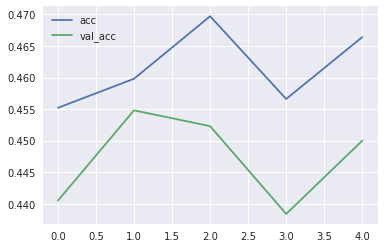

In [6]:
single_phase_2_history = {'acc': [0.4552, 0.4598, 0.4697, 0.4566, 0.4664],
                   'val_acc': [0.4405, 0.4548, 0.4523, 0.4384, 0.4500]}
plt.plot(single_phase_2_history['acc'], label='acc')
plt.plot(single_phase_2_history['val_acc'], label='val_acc')
plt.legend()